In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import neighbors
import pickle
import json

In [2]:
#os.chdir("/content/drive/MyDrive/GUCPP")

In [3]:
#os.getcwd()

In [4]:
data1 = pd.read_csv('autos 2.csv', header=0, date_parser=True)

In [5]:
data1.head()

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen
0,2016-03-24T11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24T00:00:00,False,70435,2016-04-07T03:16:57
1,2016-03-24T10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24T00:00:00,False,66954,2016-04-07T01:46:50
2,2016-03-14T12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14T00:00:00,False,90480,2016-04-05T12:47:46
3,2016-03-17T16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17T00:00:00,False,91074,2016-03-17T17:40:17
4,2016-03-31T17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31T00:00:00,False,60437,2016-04-06T10:17:21


In [6]:
data1.shape

(371528, 20)

In [7]:
data1.describe(include='all')

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528,371528.00000,371528
unique,280500,233531,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,1,NaN,182806
top,2016-03-24T14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03T00:00:00,False,NaN,2016-04-06T13:45:54
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,371528,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,NaN,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,NaN,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,NaN,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,NaN,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,NaN,71546.00000,NaN


In [8]:
data1.dtypes

datecrawled            object
name                   object
seller                 object
offertype              object
price                   int64
abtest                 object
vehicletype            object
yearofregistration      int64
gearbox                object
powerps                 int64
model                  object
kilometer               int64
monthofregistration     int64
fueltype               object
brand                  object
notrepaireddamage      object
datecreated            object
nrofpictures             bool
postalcode              int64
lastseen               object
dtype: object

In [9]:
data1.isnull().sum()

datecrawled                0
name                       0
seller                     0
offertype                  0
price                      0
abtest                     0
vehicletype            37869
yearofregistration         0
gearbox                20209
powerps                    0
model                  20484
kilometer                  0
monthofregistration        0
fueltype               33386
brand                      0
notrepaireddamage      72060
datecreated                0
nrofpictures               0
postalcode                 0
lastseen                   0
dtype: int64

In [10]:
Q1 = data1.price.quantile(0.25)
Q3 = data1.price.quantile(0.75)
IQR = Q3 - Q1
print(Q1,IQR,Q3)

1150.0 6050.0 7200.0


In [11]:
data_1 = data1[data1['price']<500000]
print(data_1.shape)
data_1.sample(5)

(371426, 20)


,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen
198373,2016-03-07T12:55:52,Mercedes_A140_TÜV__07/2016,privat,Angebot,550,test,NaN,2016,NaN,82,NaN,150000,5,NaN,mercedes_benz,NaN,2016-03-07T00:00:00,False,86899,2016-03-12T02:44:34
250212,2016-03-30T21:55:29,Mercedes_Benz_GLK_220_CDI_DPF_4Matic_BlueEFFIC...,privat,Angebot,25850,test,suv,2011,automatik,170,glk,50000,1,diesel,mercedes_benz,nein,2016-03-30T00:00:00,False,25462,2016-04-05T13:16:08
87455,2016-03-16T19:56:58,Mazda_626_TÜV_bis_08.2017,privat,Angebot,900,test,limousine,2001,manuell,101,6_reihe,150000,3,benzin,mazda,ja,2016-03-16T00:00:00,False,26169,2016-03-23T07:48:17
136335,2016-03-25T21:54:01,SUCHE_AUTO___oder_transporter_DRINGEND,privat,Angebot,1000,test,NaN,1000,NaN,0,NaN,5000,0,NaN,sonstige_autos,NaN,2016-03-25T00:00:00,False,19246,2016-03-30T17:47:53
119839,2016-03-21T13:52:09,Skoda_Octavia_Combi_2.0_TDI_Green_tec_4x4_DSG_...,privat,Angebot,29999,test,kombi,2015,automatik,184,octavia,40000,1,diesel,skoda,nein,2016-03-21T00:00:00,False,85080,2016-04-06T09:46:34


In [12]:
data2 = data_1.copy()

In [13]:
data2 = data2.replace({'ja':1,'nein':0})

In [14]:
data2['notrepaireddamage']

0         NaN
1         1.0
2         NaN
3         0.0
4         0.0
         ... 
371523    NaN
371524    0.0
371525    0.0
371526    NaN
371527    0.0
Name: notrepaireddamage, Length: 371426, dtype: float64

In [15]:
data2['notrepaireddamage'] = data2['notrepaireddamage'].fillna(data2['notrepaireddamage'].mode()[0])

In [16]:
data1.nunique()

datecrawled            280500
name                   233531
seller                      2
offertype                   2
price                    5597
abtest                      2
vehicletype                 8
yearofregistration        155
gearbox                     2
powerps                   794
model                     251
kilometer                  13
monthofregistration        13
fueltype                    7
brand                      40
notrepaireddamage           2
datecreated               114
nrofpictures                1
postalcode               8150
lastseen               182806
dtype: int64

In [17]:
for col in data2.columns:
    print("No of Unique levels in",col,":",((len(data2[col].unique())/len(data2[col]))*100))

No of Unique levels in datecrawled : 75.506830431903
No of Unique levels in name : 62.85235820863375
No of Unique levels in seller : 0.0005384652662979974
No of Unique levels in offertype : 0.0005384652662979974
No of Unique levels in price : 1.496125742408986
No of Unique levels in abtest : 0.0005384652662979974
No of Unique levels in vehicletype : 0.002423093698340988
No of Unique levels in yearofregistration : 0.0417310581380948
No of Unique levels in gearbox : 0.0008076978994469963
No of Unique levels in powerps : 0.212155314921411
No of Unique levels in model : 0.06784662355354769
No of Unique levels in kilometer : 0.003500024230936983
No of Unique levels in monthofregistration : 0.003500024230936983
No of Unique levels in fueltype : 0.00215386106519199
No of Unique levels in brand : 0.01076930532595995
No of Unique levels in notrepaireddamage : 0.0005384652662979974
No of Unique levels in datecreated : 0.03069252017898585
No of Unique levels in nrofpictures : 0.000269232633148998

In [18]:
data2.columns

Index(['datecrawled', 'name', 'seller', 'offertype', 'price', 'abtest',
       'vehicletype', 'yearofregistration', 'gearbox', 'powerps', 'model',
       'kilometer', 'monthofregistration', 'fueltype', 'brand',
       'notrepaireddamage', 'datecreated', 'nrofpictures', 'postalcode',
       'lastseen'],
      dtype='object')

In [19]:
print("----For seller----")
print(data2.seller.value_counts(normalize=True))
print("----For vehicletype----")
print(data2.vehicletype.value_counts(normalize=True))
print("----For yearofregistration----")
print(data2.yearofregistration.value_counts(normalize=True))
print("----For powerps----")
print(data2.powerps.value_counts(normalize=True))
print("----For model----")
print(data2.model.value_counts(normalize=True))
print("----For kilometer----")
print(data2.kilometer.value_counts(normalize=True))
print("----For nrofpictures----")
print(data2.nrofpictures.value_counts(normalize=True))
print("----For notrepaireddamage----")
print(data2.notrepaireddamage.value_counts(normalize=True))

----For seller----
privat        0.999992
gewerblich    0.000008
Name: seller, dtype: float64
----For vehicletype----
limousine     0.287426
kleinwagen    0.239870
kombi         0.202507
bus           0.090525
cabrio        0.068626
coupe         0.056914
suv           0.044081
andere        0.010051
Name: vehicletype, dtype: float64
----For yearofregistration----
2000    0.066070
1999    0.061288
2005    0.060071
2006    0.054455
2001    0.054425
          ...   
4100    0.000003
3500    0.000003
1200    0.000003
5300    0.000003
2290    0.000003
Name: yearofregistration, Length: 155, dtype: float64
----For powerps----
0        0.109823
75       0.064699
60       0.042821
150      0.041575
140      0.036575
           ...   
670      0.000003
15001    0.000003
9010     0.000003
13616    0.000003
1910     0.000003
Name: powerps, Length: 788, dtype: float64
----For model----
golf               0.085649
andere             0.075193
3er                0.058593
polo               0.037290
c

In [20]:
print("----For yearofregistration----")
print(min(data2.yearofregistration))
print(max(data2.yearofregistration))
print("----For powerps----")
print(min(data2.powerps))
print(max(data2.powerps))
print("----For kilometer----")
print(min(data2.kilometer))
print(max(data2.kilometer))

----For yearofregistration----
1000
9999
----For powerps----
0
20000
----For kilometer----
5000
150000


In [21]:
data2 = data2.drop(['seller','datecrawled','name','postalcode','abtest','lastseen','datecreated', 'nrofpictures'], axis=1)

In [22]:
data2.head()

,offertype,price,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage
0,Angebot,480,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,0.0
1,Angebot,18300,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,1.0
2,Angebot,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,0.0
3,Angebot,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,0.0
4,Angebot,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,0.0


In [23]:
data2 = data2.dropna().reset_index()

In [24]:
data2.shape

(299827, 13)

In [25]:
data2

,index,offertype,price,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage
0,2,Angebot,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,0.0
1,3,Angebot,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,0.0
2,4,Angebot,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,0.0
3,5,Angebot,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,1.0
4,6,Angebot,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299822,371521,Angebot,1150,bus,2000,manuell,0,zafira,150000,3,benzin,opel,0.0
299823,371524,Angebot,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,0.0
299824,371525,Angebot,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,0.0
299825,371526,Angebot,3400,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,0.0


In [26]:
data1.shape[0]-data2.shape[0]

71701

In [27]:
data1.shape[1]-data2.shape[1]

7

In [28]:
data2.describe(include='all')

,index,offertype,price,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage
count,299827.000000,299827,299827.000000,299827,299827.000000,299827,299827.000000,299827,299827.000000,299827.000000,299827,299827,299827.000000
unique,NaN,2,NaN,8,NaN,2,NaN,251,NaN,NaN,7,39,NaN
top,NaN,Angebot,NaN,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,NaN
freq,NaN,299823,NaN,87291,NaN,231683,NaN,24355,NaN,NaN,196683,63067,NaN
mean,185748.340813,NaN,6275.947553,NaN,2002.935116,NaN,123.522341,NaN,125315.181755,6.079349,NaN,NaN,0.093411
std,107248.274489,NaN,8950.823880,NaN,6.577648,NaN,172.034165,NaN,39339.320644,3.537881,NaN,NaN,0.291007
min,2.000000,NaN,0.000000,NaN,1910.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,0.000000
25%,92870.500000,NaN,1400.000000,NaN,1999.000000,NaN,75.000000,NaN,100000.000000,3.000000,NaN,NaN,0.000000
50%,185719.000000,NaN,3500.000000,NaN,2003.000000,NaN,114.000000,NaN,150000.000000,6.000000,NaN,NaN,0.000000
75%,278591.500000,NaN,7999.000000,NaN,2007.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,0.000000


# Observations



*   **outlier check for yearofregistration**
*   **outlier check for powerps**
*   **filter models**
*   **filter registration month**
*   ***review brand values***







In [29]:
models = pd.DataFrame(data2['model'])

In [30]:
models.sample(10)

,model
51134,polo
61879,corsa
22415,lupo
14594,3er
158459,golf
126659,a4
29175,golf
104327,3er
260348,polo
98713,corsa


In [31]:
brand = pd.DataFrame(data2['brand'])

In [32]:
brand.sample(10)

,brand
261443,renault
65609,ford
268269,opel
15507,citroen
250837,bmw
30845,audi
8548,audi
102886,mercedes_benz
284975,volkswagen
21376,volkswagen


In [33]:
brandlist = data2.brand.unique().tolist()
print(len(brandlist))
brandlist

39


['jeep',
 'volkswagen',
 'skoda',
 'bmw',
 'peugeot',
 'ford',
 'mazda',
 'nissan',
 'renault',
 'mercedes_benz',
 'seat',
 'honda',
 'fiat',
 'mini',
 'smart',
 'opel',
 'audi',
 'alfa_romeo',
 'subaru',
 'volvo',
 'mitsubishi',
 'hyundai',
 'kia',
 'suzuki',
 'lancia',
 'porsche',
 'citroen',
 'toyota',
 'chevrolet',
 'dacia',
 'daihatsu',
 'chrysler',
 'jaguar',
 'rover',
 'saab',
 'daewoo',
 'land_rover',
 'trabant',
 'lada']

In [34]:
modellist = data2.model.unique()
print(len(modellist))
modellist

251


array(['grand', 'golf', 'fabia', '3er', '2_reihe', 'andere', 'c_max',
       '3_reihe', 'passat', 'navara', 'twingo', 'a_klasse', 'scirocco',
       '5er', 'arosa', 'civic', 'transporter', 'punto', 'e_klasse', 'one',
       'fortwo', 'clio', '1er', 'b_klasse', 'astra', 'a8', 'jetta',
       'polo', 'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156',
       'escort', 'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'slk', '7er', 'corsa', '80', '147',
       'glk', 'meriva', 'z_reihe', 'sorento', 'v40', 'ibiza', 'mustang',
       'eos', 'touran', 'getz', 'insignia', 'ka', 'megane', 'a3', 'lupo',
       'r19', 'mondeo', 'colt', 'vectra', 'berlingo', 'm_klasse',
       'tiguan', 'sharan', '6_reihe', 'c4', 'panda', 'up', 'i_reihe',
       'ceed', 'kangoo', '5_reihe', 'yeti', 'octavia', 'zafira', 'mii',
       'rx_reihe', '6er', 'fox', 'matiz', 'beetle', 'rio', 'touareg',
       'logan', 'caddy', 'omega', 'cuore', 's_max', 'modus', 'a2',
      

In [35]:
bandm = data2[['brand','model']]

In [36]:
bandm.shape

(299827, 2)

In [37]:
gpdbandm = bandm.groupby(['brand','model']).count()

In [38]:
gpdbandm_s = bandm.groupby(['brand','model']).size()

In [39]:
gpdbandm.head(50)

Empty DataFrame
Columns: []
Index: [(alfa_romeo, 145), (alfa_romeo, 147), (alfa_romeo, 156), (alfa_romeo, 159), (alfa_romeo, andere), (alfa_romeo, spider), (audi, 100), (audi, 200), (audi, 80), (audi, 90), (audi, a1), (audi, a2), (audi, a3), (audi, a4), (audi, a5), (audi, a6), (audi, a8), (audi, andere), (audi, q3), (audi, q5), (audi, q7), (audi, tt), (bmw, 1er), (bmw, 3er), (bmw, 5er), (bmw, 6er), (bmw, 7er), (bmw, andere), (bmw, i3), (bmw, m_reihe), (bmw, x_reihe), (bmw, z_reihe), (chevrolet, andere), (chevrolet, aveo), (chevrolet, captiva), (chevrolet, matiz), (chevrolet, spark), (chrysler, 300c), (chrysler, andere), (chrysler, crossfire), (chrysler, grand), (chrysler, ptcruiser), (chrysler, voyager), (citroen, andere), (citroen, berlingo), (citroen, c1), (citroen, c2), (citroen, c3), (citroen, c4), (citroen, c5)]

In [40]:
gpdbandm_s.head(20)

brand       model 
alfa_romeo  145         34
            147        473
            156        535
            159        194
            andere     489
            spider     183
audi        100        366
            200         15
            80        1298
            90          78
            a1         594
            a2         329
            a3        5486
            a4        9125
            a5         984
            a6        5475
            a8         521
            andere    1508
            q3         238
            q5         444
dtype: int64

In [41]:
gpdbandm.to_csv(r'gpdbandm.csv')

In [42]:
Q1 = data2.yearofregistration.quantile(0.25)
Q3 = data2.yearofregistration.quantile(0.75)
IQR = Q3 - Q1

In [43]:
print(Q1,Q3,IQR)

1999.0 2007.0 8.0


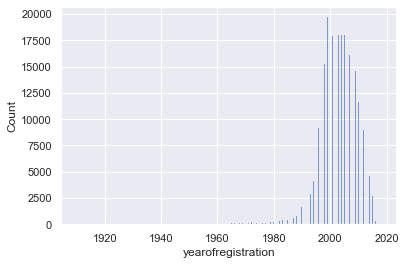

In [44]:
sns.set(style="darkgrid")
sns.histplot(data=data2, x="yearofregistration")
plt.show()

In [45]:
print(min(data2.yearofregistration))
print(max(data2.yearofregistration))

1910
2018


In [46]:
data2.shape

(299827, 13)

In [47]:
data2 = data2[data2['yearofregistration'] > 1980]
data2.shape

(297229, 13)

In [48]:
Q1 = data2.powerps.quantile(0.25)
Q3 = data2.powerps.quantile(0.75)
IQR = Q3 - Q1

In [49]:
print(Q1,Q3,IQR)

75.0 150.0 75.0


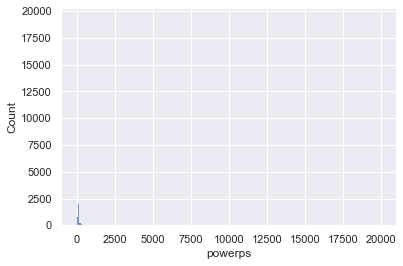

In [50]:
sns.set(style="darkgrid")
sns.histplot(data=data2, x="powerps")
plt.show()

<AxesSubplot:ylabel='powerps'>

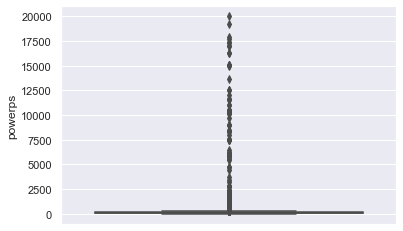

In [51]:
sns.boxplot( y=data2["powerps"] )

In [52]:
print(min(data2.powerps))
print(max(data2.powerps))

0
20000


In [53]:
print(len(data2[data2['powerps'] > 350]))
print(len(data2[data2['powerps'] < 50]))

2418
19737


In [54]:
data2 = data2[data2['powerps'] < 350]
data2 = data2[data2['powerps'] > 50]
data2.shape

(271530, 13)

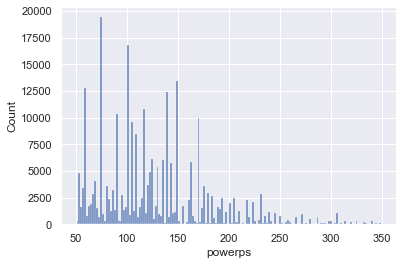

In [55]:
sns.set(style="darkgrid")
sns.histplot(data=data2, x="powerps")
plt.show()

In [56]:
data2['monthofregistration' ].nunique()

13

In [57]:
len(data2[data2['monthofregistration'] == 0])

10163

In [58]:
print(data2.shape)
data2 = data2[data2['monthofregistration'] > 0]
print(data2.shape)

(271530, 13)
(261367, 13)


In [59]:
print(data2['vehicletype'].unique())

['suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi' 'coupe' 'andere']


In [60]:
data2 = data2.drop('index', axis =1)

In [61]:
data2 = data2[data2.model != "andere"]

In [62]:
data2.shape

(242901, 12)

In [63]:
print(data2['vehicletype'].unique())

['suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi' 'coupe' 'andere']


In [64]:
sample = data2[data2.model == "andere"]
sample.head()

,offertype,price,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage


In [65]:
data2.nunique()

offertype                 2
price                  4720
vehicletype               8
yearofregistration       38
gearbox                   2
powerps                 289
model                   247
kilometer                13
monthofregistration      12
fueltype                  7
brand                    38
notrepaireddamage         2
dtype: int64

In [66]:
#Target
Target = pd.DataFrame(data2['price'])
Target.shape

(242901, 1)

In [67]:
#Independent Features
IF = data2.drop('price',axis =1)
IF.shape

(242901, 11)

In [68]:
IF["powerps_bin"] = pd.cut(IF['powerps'], bins=[50, 100, 200, 250, 350], labels= ["1","2","3","4"])

In [69]:
#IF["brandmodel"] = IF['brand'] + IF['model']

In [70]:
IF.head()

,offertype,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,powerps_bin
0,Angebot,suv,2004,automatik,163,grand,125000,8,diesel,jeep,0.0,2
1,Angebot,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,0.0,1
2,Angebot,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,0.0,1
3,Angebot,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,1.0,2
4,Angebot,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,0.0,2


In [71]:
IF2 = IF.drop(['powerps'], axis=1)
IF2.head()

,offertype,vehicletype,yearofregistration,gearbox,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,powerps_bin
0,Angebot,suv,2004,automatik,grand,125000,8,diesel,jeep,0.0,2
1,Angebot,kleinwagen,2001,manuell,golf,150000,6,benzin,volkswagen,0.0,1
2,Angebot,kleinwagen,2008,manuell,fabia,90000,7,diesel,skoda,0.0,1
3,Angebot,limousine,1995,manuell,3er,150000,10,benzin,bmw,1.0,2
4,Angebot,cabrio,2004,manuell,2_reihe,150000,8,benzin,peugeot,0.0,2


In [72]:
IF2.shape

(242901, 11)

In [73]:
yearofreg = pd.DataFrame(IF2['yearofregistration'])
yearofreg.head()

,yearofregistration
0,2004
1,2001
2,2008
3,1995
4,2004


In [74]:
# FOR LABEL ENCODING - THIS WILL BE DONE LATER ON

#Train2 = Train2.drop(['yearofregistration'], axis=1)

In [75]:
#Train2 = Train2.apply(LabelEncoder().fit_transform)

In [76]:
#Train2.head()

In [77]:
#Train2 = pd.concat([Train2,yearofreg],axis=1)

In [78]:
IF2.head()

,offertype,vehicletype,yearofregistration,gearbox,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,powerps_bin
0,Angebot,suv,2004,automatik,grand,125000,8,diesel,jeep,0.0,2
1,Angebot,kleinwagen,2001,manuell,golf,150000,6,benzin,volkswagen,0.0,1
2,Angebot,kleinwagen,2008,manuell,fabia,90000,7,diesel,skoda,0.0,1
3,Angebot,limousine,1995,manuell,3er,150000,10,benzin,bmw,1.0,2
4,Angebot,cabrio,2004,manuell,2_reihe,150000,8,benzin,peugeot,0.0,2


In [79]:
IF2.shape

(242901, 11)

In [80]:
IF2.nunique()

offertype                2
vehicletype              8
yearofregistration      38
gearbox                  2
model                  247
kilometer               13
monthofregistration     12
fueltype                 7
brand                   38
notrepaireddamage        2
powerps_bin              4
dtype: int64

In [81]:
CatCol_IF2 = ['offertype', 'vehicletype','gearbox', 'kilometer','monthofregistration','fueltype','notrepaireddamage','powerps_bin']
NumCol_IF2 = ['yearofregistration', 'brand','model']

In [82]:
for col in CatCol_IF2:
        IF2[col]= IF2[col].astype('category')

In [83]:
# COMMENTED DUE TO POSTPONED LABEL ENCODING

#for col in NumCol_Train2:
#        Train2[col]= Train2[col].astype('int64')

In [84]:
IF2.dtypes

offertype              category
vehicletype            category
yearofregistration        int64
gearbox                category
model                    object
kilometer              category
monthofregistration    category
fueltype               category
brand                    object
notrepaireddamage      category
powerps_bin            category
dtype: object

In [85]:
IF2.shape

(242901, 11)

In [86]:
IF3 = pd.get_dummies(IF2, columns=['offertype', 'vehicletype','gearbox', 'kilometer','monthofregistration','fueltype','notrepaireddamage','powerps_bin'], drop_first= True, dtype= 'int')
print(IF3.shape)
IF3.head()

(242901, 45)


,yearofregistration,model,brand,offertype_Gesuch,vehicletype_bus,vehicletype_cabrio,vehicletype_coupe,vehicletype_kleinwagen,vehicletype_kombi,vehicletype_limousine,...,fueltype_benzin,fueltype_cng,fueltype_diesel,fueltype_elektro,fueltype_hybrid,fueltype_lpg,notrepaireddamage_1.0,powerps_bin_2,powerps_bin_3,powerps_bin_4
0,2004,grand,jeep,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2001,golf,volkswagen,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2008,fabia,skoda,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1995,3er,bmw,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
4,2004,2_reihe,peugeot,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [87]:
TypeCov = IF3.drop(['yearofregistration','brand','model'], axis=1)

for col in TypeCov:
        IF3[col]= IF3[col].astype('category')

In [88]:
IF3.dtypes

yearofregistration           int64
model                       object
brand                       object
offertype_Gesuch          category
vehicletype_bus           category
vehicletype_cabrio        category
vehicletype_coupe         category
vehicletype_kleinwagen    category
vehicletype_kombi         category
vehicletype_limousine     category
vehicletype_suv           category
gearbox_manuell           category
kilometer_10000           category
kilometer_20000           category
kilometer_30000           category
kilometer_40000           category
kilometer_50000           category
kilometer_60000           category
kilometer_70000           category
kilometer_80000           category
kilometer_90000           category
kilometer_100000          category
kilometer_125000          category
kilometer_150000          category
monthofregistration_2     category
monthofregistration_3     category
monthofregistration_4     category
monthofregistration_5     category
monthofregistration_

In [89]:
IF3.head()

,yearofregistration,model,brand,offertype_Gesuch,vehicletype_bus,vehicletype_cabrio,vehicletype_coupe,vehicletype_kleinwagen,vehicletype_kombi,vehicletype_limousine,...,fueltype_benzin,fueltype_cng,fueltype_diesel,fueltype_elektro,fueltype_hybrid,fueltype_lpg,notrepaireddamage_1.0,powerps_bin_2,powerps_bin_3,powerps_bin_4
0,2004,grand,jeep,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2001,golf,volkswagen,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2008,fabia,skoda,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1995,3er,bmw,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
4,2004,2_reihe,peugeot,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [90]:
IF3.shape

(242901, 45)

In [91]:
IF4 = IF3[['brand', 'model']]

In [92]:
IF3 = IF3.drop(['brand', 'model'], axis=1)

In [93]:
IF3.head()

,yearofregistration,offertype_Gesuch,vehicletype_bus,vehicletype_cabrio,vehicletype_coupe,vehicletype_kleinwagen,vehicletype_kombi,vehicletype_limousine,vehicletype_suv,gearbox_manuell,...,fueltype_benzin,fueltype_cng,fueltype_diesel,fueltype_elektro,fueltype_hybrid,fueltype_lpg,notrepaireddamage_1.0,powerps_bin_2,powerps_bin_3,powerps_bin_4
0,2004,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,2001,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,2008,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1995,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,1,1,0,0
4,2004,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0


In [94]:
IF4.head()

,brand,model
0,jeep,grand
1,volkswagen,golf
2,skoda,fabia
3,bmw,3er
4,peugeot,2_reihe


In [95]:
brandvalue_o = pd.DataFrame(IF4['brand'].unique())
brandvalue_o = brandvalue_o.sort_values(by=0)
brandvalue_o = brandvalue_o.rename(columns={0: 'brand'})

In [96]:
brandvalue_LE = brandvalue_o.apply(LabelEncoder().fit_transform)
brandvalue_LE = brandvalue_LE.rename(columns={'brand':'brand_value'})

In [97]:
brand_df= pd.concat([brandvalue_LE,brandvalue_o],axis=1)

In [98]:
brand_df.head()

,brand_value,brand
18,0,alfa_romeo
14,1,audi
3,2,bmw
24,3,chevrolet
28,4,chrysler


In [99]:
modelvalue_o = pd.DataFrame(IF4['model'].unique())
modelvalue_o = modelvalue_o.sort_values(by=0)
modelvalue_o = modelvalue_o.rename(columns={0: 'model'})
modelvalue_o

,model
164,100
233,145
45,147
161,156
129,159
...,...
151,yaris
76,yeti
136,ypsilon
48,z_reihe


In [100]:
m_le = modelvalue_o.apply(LabelEncoder().fit_transform)
m_le = m_le.rename(columns={'model':'model_value'})

In [101]:
model_df= pd.concat([m_le,modelvalue_o],axis=1)

In [102]:
model_df.head()

,model_value,model
164,0,100
233,1,145
45,2,147
161,3,156
129,4,159


In [103]:
IF4 = IF4.apply(LabelEncoder().fit_transform)

In [104]:
IF4.head()

,brand,model
0,14,117
1,36,116
2,31,101
3,2,11
4,25,8


In [105]:
Penult_0 = pd.concat([IF4, IF3], axis=1,join='inner')

In [106]:
Penult = pd.concat([Penult_0, Target], axis=1,join='inner')

In [107]:
Penult.shape

(242901, 46)

In [108]:
Penult.head()

,brand,model,yearofregistration,offertype_Gesuch,vehicletype_bus,vehicletype_cabrio,vehicletype_coupe,vehicletype_kleinwagen,vehicletype_kombi,vehicletype_limousine,...,fueltype_cng,fueltype_diesel,fueltype_elektro,fueltype_hybrid,fueltype_lpg,notrepaireddamage_1.0,powerps_bin_2,powerps_bin_3,powerps_bin_4,price
0,14,117,2004,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,9800
1,36,116,2001,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1500
2,31,101,2008,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,3600
3,2,11,1995,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,650
4,25,8,2004,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2200


In [109]:
print(data2['offertype'].unique())
print(data2['vehicletype'].unique())
print(data2['gearbox'].unique())
print(data2['kilometer'].unique())
print(data2['monthofregistration'].unique())
print(data2['fueltype'].unique())
print(data2['notrepaireddamage'].unique())

['Angebot' 'Gesuch']
['suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi' 'coupe' 'andere']
['automatik' 'manuell']
[125000 150000  90000  30000  70000 100000  60000  20000  80000  50000
  40000   5000  10000]
[ 8  6  7 10 12 11  3  2  1  4  9  5]
['diesel' 'benzin' 'lpg' 'andere' 'cng' 'elektro' 'hybrid']
[0. 1.]


In [110]:
Penult = Penult.rename(columns={'notrepaireddamage_1.0': 'notrepaireddamage_1'})

In [111]:
Penult.head()

,brand,model,yearofregistration,offertype_Gesuch,vehicletype_bus,vehicletype_cabrio,vehicletype_coupe,vehicletype_kleinwagen,vehicletype_kombi,vehicletype_limousine,...,fueltype_cng,fueltype_diesel,fueltype_elektro,fueltype_hybrid,fueltype_lpg,notrepaireddamage_1,powerps_bin_2,powerps_bin_3,powerps_bin_4,price
0,14,117,2004,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,9800
1,36,116,2001,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1500
2,31,101,2008,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,3600
3,2,11,1995,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,650
4,25,8,2004,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2200


In [112]:
#Train Test Split
X_train,X_test,y_train,y_test = train_test_split(Penult.drop(['price'],axis=1), Penult['price'],test_size = 0.15,random_state=1)

print("X TRAIN DATA SHAPE IS : ", X_train.shape)
print("X TEST DATA SHAPE IS :",X_test.shape)
print("y TRAIN DATA SHAPE IS : ", y_train.shape)
print("y TEST DATA SHAPE IS :",y_test.shape)

X TRAIN DATA SHAPE IS :  (206465, 45)
X TEST DATA SHAPE IS : (36436, 45)
y TRAIN DATA SHAPE IS :  (206465,)
y TEST DATA SHAPE IS : (36436,)


---
Steps in Standardization : SKIPPED
---

In [113]:
#Numcol_Train3 = X_train[['yearofregistration','brand','brandmodel']]
#Numcol_Test3 = X_test[['yearofregistration','brand','brandmodel']]

In [114]:
#Standardizing Numerical Columns
#scaler = MinMaxScaler()
#scaled = scaler.fit_transform(Numcol_Train3)
#scaled2 = scaler.fit_transform(Numcol_Test3)

In [115]:
#Train3_scaled_cols = pd.DataFrame(scaled, columns = ('yearofregistration','brand','brandmodel'))
#Test3_scaled_cols = pd.DataFrame(scaled2, columns = ('yearofregistration','brand','brandmodel'))

In [116]:
#Train3_scaled_cols

In [117]:
#Test3_scaled_cols

In [118]:
#X_train = X_train.drop(['yearofregistration','brand','brandmodel'], axis=1)

In [119]:
#X_train = X_train.reset_index(drop=True)

In [120]:
#X_train.head()

In [121]:
#X_train.shape

In [122]:
#X_test = X_test.drop(['yearofregistration','brand','brandmodel'], axis=1)

In [123]:
#X_test = X_test.reset_index(drop=True)

In [124]:
#X_test.head()

In [125]:
#X_test.shape

In [126]:
#X_train = pd.concat([Train3_scaled_cols, X_train], axis=1,join='inner')
#X_train.shape

In [127]:
#X_train.head()

In [128]:
#X_test = pd.concat([Test3_scaled_cols, X_test], axis=1,join='inner')
#X_test.shape

In [129]:
#X_test.head()

##Models Skipped

In [130]:
##Training with Random Forest
#RF = RandomForestRegressor(n_estimators=100)

##fit the model
#RF.fit(X_train, y_train)

In [131]:
#pred_RF1 = RF.predict(X_test)

In [132]:
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_RF1)))

In [133]:
#Training with KNN
#knn_9 = neighbors.KNeighborsRegressor(n_neighbors = 9)

In [134]:
#knn_9.fit(X_train, y_train)

In [135]:
#pred_knn_9 = knn_9.predict(X_test)

In [136]:
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_knn_9)))

In [137]:
#zxgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)

In [138]:
#X_train_2 = X_train.astype('float64')

In [139]:
#xgb.fit(X_train_2,y_train)

In [140]:
#WX_test_2 = X_test.astype('float64')

In [141]:
#pred_xgb = xgb.predict(X_test_2)

In [142]:
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_xgb)))

In [143]:
#Training with KNN
#knn_25 = neighbors.KNeighborsRegressor(n_neighbors = 25)

In [144]:
#knn_25.fit(X_train, y_train)

In [145]:
#pred_knn_25 = knn_25.predict(X_test)

In [146]:
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_knn_25)))

In [147]:
#Training with KNN
#knn_50 = neighbors.KNeighborsRegressor(n_neighbors = 50)

In [148]:
#knn_50.fit(X_train, y_train)

In [149]:
#pred_knn_50 = knn_50.predict(X_test)

In [150]:
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_knn_50)))

In [151]:
#Training with KNN
#knn_100 = neighbors.KNeighborsRegressor(n_neighbors = 100)

In [152]:
#knn_100.fit(X_train, y_train)

In [153]:
#pred_knn_100 = knn_100.predict(X_test)

In [154]:
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_knn_100)))

#KNN Model

In [155]:
#Training with KNN
knn= neighbors.KNeighborsRegressor(n_neighbors = 100)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

In [156]:
pred_knn = knn.predict(X_test)

In [157]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_knn)))

RMSE: 3001.3311125339214


In [158]:
pickle_out = open("classifier.pkl","wb")
pickle.dump(knn, pickle_out)
pickle_out.close()

In [159]:
columns = {
    'data_columns': [col.lower() for col in X_train.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [160]:
print(brand_df.columns)
print(model_df.columns)

Index(['brand_value', 'brand'], dtype='object')
Index(['model_value', 'model'], dtype='object')


In [161]:
brandindex_list = {
    'brand': [col for col in brand_df.brand],
    'brand_value': [col for col in brand_df.brand_value]
}

In [162]:
model_df.head()

,model_value,model
164,0,100
233,1,145
45,2,147
161,3,156
129,4,159


In [163]:
modelindex_list = {
    'model': [col for col in model_df.model],
    'model_value': [col for col in model_df.model_value]
}

In [164]:
with open("brand.json","w") as f:
    f.write(json.dumps(brandindex_list))

In [165]:
with open("model.json","w") as f:
    f.write(json.dumps(modelindex_list))

In [166]:
brand_names = brandindex_list.get('brand')

In [167]:
brand_index = brandindex_list.get('brand_value')

In [168]:
model_names = modelindex_list.get('model')

In [169]:
model_index = modelindex_list.get('model_value')

In [170]:
brand_names[0]

'alfa_romeo'

In [171]:
brand_index[0]

0

In [172]:
model_names[0]

'100'

In [173]:
model_index[0]

0

In [174]:
for i in range(len(brand_index)):
  print(f"{brand_index[i]} : \"{brand_names[i]}\",")

0 : "alfa_romeo",
1 : "audi",
2 : "bmw",
3 : "chevrolet",
4 : "chrysler",
5 : "citroen",
6 : "dacia",
7 : "daewoo",
8 : "daihatsu",
9 : "fiat",
10 : "ford",
11 : "honda",
12 : "hyundai",
13 : "jaguar",
14 : "jeep",
15 : "kia",
16 : "lada",
17 : "lancia",
18 : "land_rover",
19 : "mazda",
20 : "mercedes_benz",
21 : "mini",
22 : "mitsubishi",
23 : "nissan",
24 : "opel",
25 : "peugeot",
26 : "porsche",
27 : "renault",
28 : "rover",
29 : "saab",
30 : "seat",
31 : "skoda",
32 : "smart",
33 : "subaru",
34 : "suzuki",
35 : "toyota",
36 : "volkswagen",
37 : "volvo",


In [175]:
for i in range(len(model_index)):
  print(f"{model_index[i]} : \"{model_names[i]}\",")

0 : "100",
1 : "145",
2 : "147",
3 : "156",
4 : "159",
5 : "1_reihe",
6 : "1er",
7 : "200",
8 : "2_reihe",
9 : "300c",
10 : "3_reihe",
11 : "3er",
12 : "4_reihe",
13 : "500",
14 : "5_reihe",
15 : "5er",
16 : "6_reihe",
17 : "6er",
18 : "7er",
19 : "80",
20 : "850",
21 : "90",
22 : "900",
23 : "9000",
24 : "911",
25 : "a1",
26 : "a2",
27 : "a3",
28 : "a4",
29 : "a5",
30 : "a6",
31 : "a8",
32 : "a_klasse",
33 : "accord",
34 : "agila",
35 : "alhambra",
36 : "almera",
37 : "altea",
38 : "amarok",
39 : "antara",
40 : "arosa",
41 : "astra",
42 : "auris",
43 : "avensis",
44 : "aveo",
45 : "aygo",
46 : "b_klasse",
47 : "b_max",
48 : "beetle",
49 : "berlingo",
50 : "bora",
51 : "boxster",
52 : "bravo",
53 : "c1",
54 : "c2",
55 : "c3",
56 : "c4",
57 : "c5",
58 : "c_klasse",
59 : "c_max",
60 : "c_reihe",
61 : "caddy",
62 : "calibra",
63 : "captiva",
64 : "carisma",
65 : "carnival",
66 : "cayenne",
67 : "cc",
68 : "ceed",
69 : "charade",
70 : "cherokee",
71 : "citigo",
72 : "civic",
73 : "cl",
74 

In [176]:
YoR_1 = X_train.yearofregistration.sort_values()

In [177]:
YoR_1.unique()

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018], dtype=int64)